In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/Users/ryanscholte/Desktop/GitHub/HW4/data/output/final_ma_data.csv")


/var/folders/mn/l2nrwsxn24g6ywz6ygh2fxp40000gn/T/ipykernel_59493/1871098850.py:9: DtypeWarning: Columns (68,98,99,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/ryanscholte/Desktop/GitHub/HW4/data/output/final_ma_data.csv")


In [2]:
df.head()

,contractid,planid,org_type,plan_type,partd,snp,eghp,org_name,org_marketing_name,plan_name,...,risk_star5,risk_star45,risk_star4,risk_star35,risk_star3,risk_star25,risk_bonus5,risk_bonus35,risk_bonus0,ma_rate
0,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953.76
1,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,895.64
2,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941.69
3,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073.64
4,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,942.86


<Figure size 1200x600 with 0 Axes>

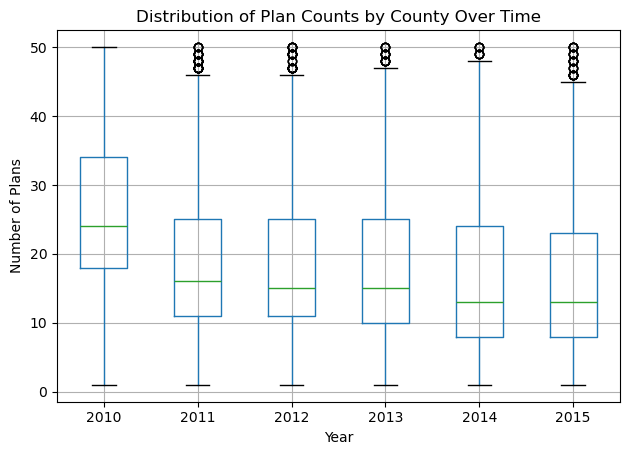

In [3]:
#Q1

# Normalize column names

# Remove SNPs
df = df[df['snp'] != 'Yes']

# Remove 800-series plans
df = df[~df['planid'].astype(str).str.startswith('800')]

# Remove prescription drug-only plans (PDPs)
df = df[~df['plan_type'].str.contains('PDP', na=False)]

# Group by year and county to count number of plans
plan_counts = (
    df.groupby(['year', 'county'])
    .size()
    .reset_index(name='plan_count')
)

# Plot a box and whisker plot of plan counts by year

# only plot counts from 0-50 ignore outliers
plan_counts = plan_counts[plan_counts['plan_count'] <= 50]

plt.figure(figsize=(12, 6))
plan_counts.boxplot(column='plan_count', by='year')
plt.title('Distribution of Plan Counts by County Over Time')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Number of Plans')
plt.grid(True)
plt.tight_layout()
plt.show()

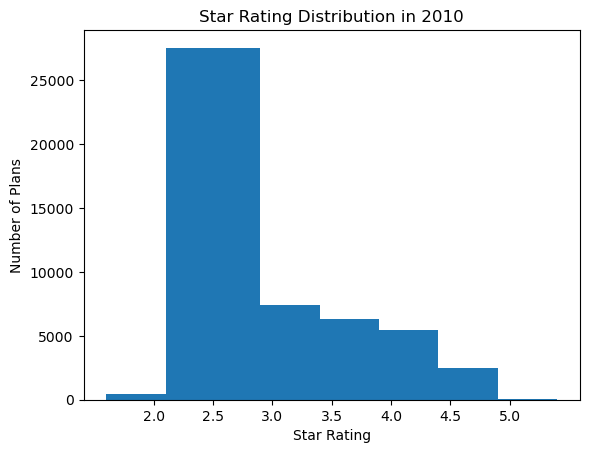

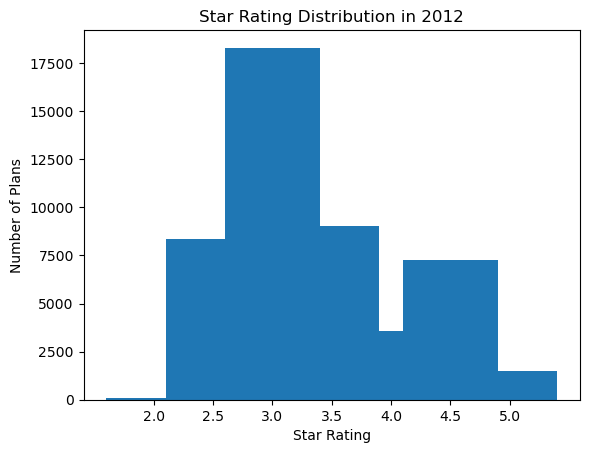

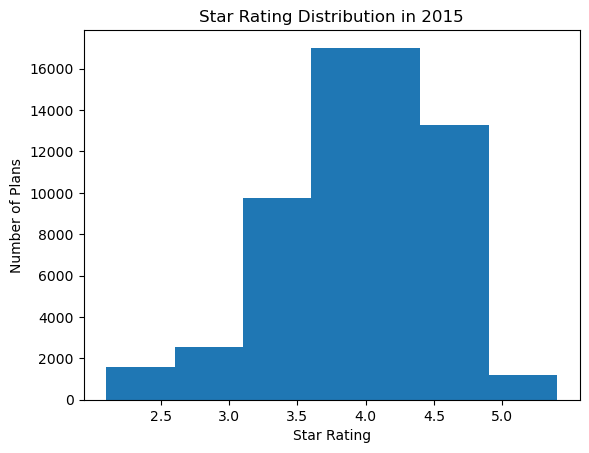

In [17]:
# Filter data for the years 2010, 2012, and 2015
df_2010 = df[df['year'] == 2010]
df_2012 = df[df['year'] == 2012]
df_2015 = df[df['year'] == 2015]

# Function to plot star rating distribution
def plot_star_rating_distribution(data, year):
    star_counts = data['Star_Rating'].value_counts().sort_index()
    plt.bar(star_counts.index, star_counts.values)
    plt.title(f'Star Rating Distribution in {year}')
    plt.xlabel('Star Rating')
    plt.ylabel('Number of Plans')
    plt.xticks(star_counts.index)
    plt.show()

# Plot star rating distribution for 2010
plot_star_rating_distribution(df_2010, 2010)

# Plot star rating distribution for 2012
plot_star_rating_distribution(df_2012, 2012)

# Plot star rating distribution for 2015
plot_star_rating_distribution(df_2015, 2015)

In [12]:
df_2010.columns[1:20]

Index(['planid', 'org_type', 'plan_type', 'partd', 'snp', 'eghp', 'org_name',
       'org_marketing_name', 'plan_name', 'parent_org', 'contract_date', 'ssa',
       'fips', 'state', 'county', 'avg_enrollment', 'year',
       'breastcancer_screen', 'rectalcancer_screen'],
      dtype='object')

In [13]:
df_2010.columns[20:40]

Index(['cv_cholscreen', 'diabetes_cholscreen', 'glaucoma_test', 'monitoring',
       'flu_vaccine', 'pn_vaccine', 'primaryaccess', 'hospital_followup',
       'depression_followup', 'nodelays', 'carequickly', 'overallrating_care',
       'overallrating_plan', 'calltime', 'doctor_communicate', 'osteo_manage',
       'diabetes_eye', 'diabetes_kidney', 'diabetes_bloodsugar',
       'diabetes_chol'],
      dtype='object')

In [14]:
df_2010.columns[40:60]

Index(['antidepressant', 'bloodpressure', 'ra_manage', 'copd_test',
       'betablocker', 'appeals_timely', 'appeals_review', 'new_contract',
       'physical_health', 'mental_health', 'osteo_test', 'physical_monitor',
       'customer_service', 'bladder', 'falling', 'partc_score',
       'cv_diab_cholscreen', 'diab_healthy', 'complaints_plan', 'leave_plan'],
      dtype='object')

In [15]:
df_2010.columns[60:80]

Index(['audit_problems', 'hold_times', 'info_accuracy', 'ttyt_available',
       'diab_cholscreen', 'corrective_action', 'low_score', 'partcd_score',
       'org_parent', 'bmi_assess', 'older_medication', 'older_function',
       'older_pain', 'readmissions', 'access_problems', 'coordination',
       'improve', 'enroll_timely', 'specialneeds_manage', 'state_long'],
      dtype='object')

In [16]:
df_2010.columns[80:108]

Index(['county_long', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'Star_Rating', 'state_name', 'aged_parta',
       'aged_partb', 'risk_ab', 'risk_star5', 'risk_star45', 'risk_star4',
       'risk_star35', 'risk_star3', 'risk_star25', 'risk_bonus5',
       'risk_bonus35', 'risk_bonus0', 'ma_rate'],
      dtype='object')

Index(['contractid', 'planid', 'org_type', 'plan_type', 'partd', 'snp', 'eghp',
       'org_name', 'org_marketing_name', 'plan_name',
       ...
       'risk_star5', 'risk_star45', 'risk_star4', 'risk_star35', 'risk_star3',
       'risk_star25', 'risk_bonus5', 'risk_bonus35', 'risk_bonus0', 'ma_rate'],
      dtype='object', length=108)


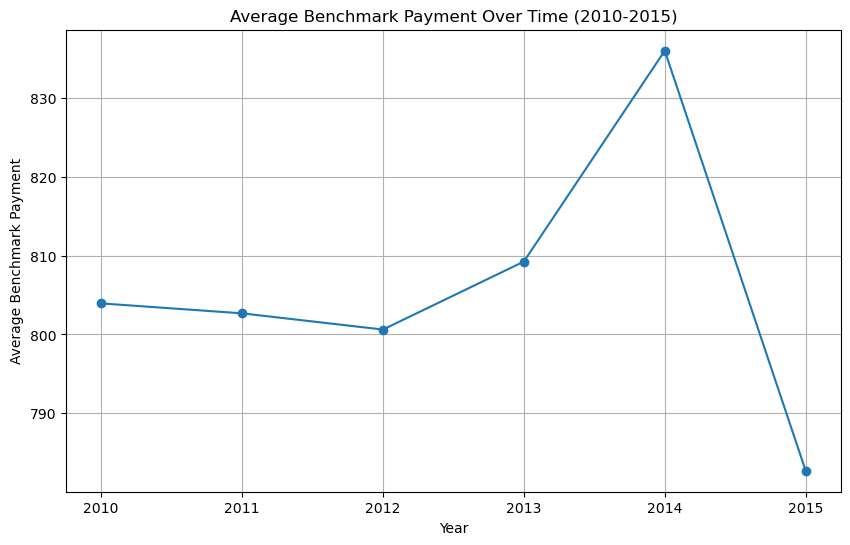

The average benchmark payment rose by $-21.24 from 2010 to 2015.


In [ ]:
#Q3

# Calculate the average benchmark payment for each year
average_benchmark_payment = df.groupby('year')['ma_rate'].mean().reset_index()

# Plot the average benchmark payment over time
plt.figure(figsize=(10, 6))
plt.plot(average_benchmark_payment['year'], average_benchmark_payment['ma_rate'], marker='o')
plt.title('Average Benchmark Payment Over Time (2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Benchmark Payment')
plt.grid(True)
plt.show()

# Calculate the rise in the average benchmark payment from 2010 to 2015
benchmark_2010 = average_benchmark_payment[average_benchmark_payment['year'] == 2010]['ma_rate'].values[0]
benchmark_2015 = average_benchmark_payment[average_benchmark_payment['year'] == 2015]['ma_rate'].values[0]
rise = benchmark_2015 - benchmark_2010
print(f"The average benchmark payment rose by ${rise:.2f} from 2010 to 2015.")



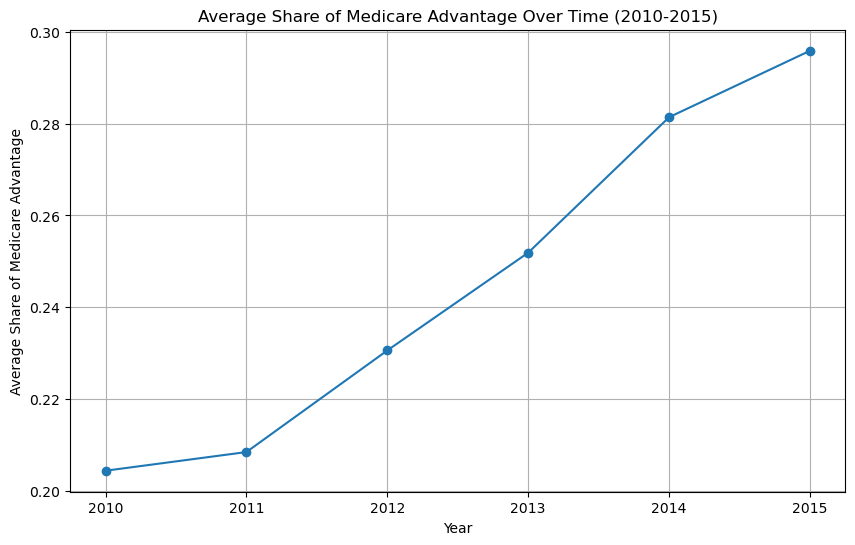

In [ ]:
#Q4

df3=df.copy()

# Calculate the average share of Medicare Advantage for each year
df3['ma_share'] = df3['avg_enrolled'] / df3['avg_eligibles']
df3 = df3.groupby('year')['ma_share'].mean().reset_index()

# Plot the average share of Medicare Advantage over time
plt.figure(figsize=(10, 6))
plt.plot(df3['year'], df3['ma_share'], marker='o')
plt.title('Average Share of Medicare Advantage Over Time (2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Share of Medicare Advantage')
plt.grid(True)
plt.show()


In [ ]:
#Q5

df3 = df.copy()

# Filter for 2010
df3_2010 = df3[df3['year'] == 2010]

# List of variables used in the raw_rating calculation
rating_vars = [
    "breastcancer_screen", "rectalcancer_screen", "cv_cholscreen", "diabetes_cholscreen",
    "glaucoma_test", "monitoring", "flu_vaccine", "pn_vaccine", "physical_health",
    "mental_health", "osteo_test", "physical_monitor", "primaryaccess",
    "hospital_followup", "depression_followup", "nodelays", "carequickly",
    "overallrating_care", "overallrating_plan", "calltime",
    "doctor_communicate", "customer_service", "osteo_manage",
    "diabetes_eye", "diabetes_kidney", "diabetes_bloodsugar",
    "diabetes_chol", "antidepressant", "bloodpressure", "ra_manage",
    "copd_test", "betablocker", "bladder", "falling", "appeals_timely", "appeals_review"
]

# Compute raw_rating as the row-wise mean 
df3_2010["raw_rating"] = df3_2010[rating_vars].mean(axis=1, skipna=True)

columns_to_keep = [
    "contractid", "planid", "fips", "avg_enrollment", "state", "county", "raw_rating",
    "partc_score", "avg_eligibles", "avg_enrolled",  "risk_ab",
    "star_rating",  "ma_rate", "plan_type", "partd"
]

# missing for some reason "premium_partc","bid", "avg_ffscost",

# Subset the dataframe
df3_2010 = df3_2010[columns_to_keep]

# filter to only plantype "HMO"
df3_2010 = df3_2010[df3_2010["plan_type"] == "HMO/HMOPOS"]


# Create rounded bins similar to the R logic
df3_2010["rounded_30"] = np.where(
    (df3_2010["raw_rating"] >= 2.75) & 
    (df3_2010["raw_rating"] < 3.00) & 
    (df3_2010["star_rating"] == 3.0), 1, 0)

df3_2010["rounded_35"] = np.where(
    (df3_2010["raw_rating"] >= 3.25) & 
    (df3_2010["raw_rating"] < 3.50) & 
    (df3_2010["star_rating"] == 3.5), 1, 0)

df3_2010["rounded_40"] = np.where(
    (df3_2010["raw_rating"] >= 3.75) & 
    (df3_2010["raw_rating"] < 4.00) & 
    (df3_2010["star_rating"] == 4.0), 1, 0)

df3_2010["rounded_45"] = np.where(
    (df3_2010["raw_rating"] >= 4.25) & 
    (df3_2010["raw_rating"] < 4.50) & 
    (df3_2010["star_rating"] == 4.5), 1, 0)

df3_2010["rounded_50"] = np.where(
    (df3_2010["raw_rating"] >= 4.75) & 
    (df3_2010["raw_rating"] < 5.00) & 
    (df3_2010["star_rating"] == 5.0), 1, 0)

# Filter for star ratings of interest and group by Star_Rating
rounded_summary = (
    df3_2010[df3_2010["star_rating"].isin([3.0, 3.5, 4.0, 4.5, 5.0])]
    .groupby("star_rating")
    .agg(
        count_30=("rounded_30", "sum"),
        count_35=("rounded_35", "sum"),
        count_40=("rounded_40", "sum"),
        count_45=("rounded_45", "sum"),
        count_50=("rounded_50", "sum")
    )
    .reset_index()
)

# Add a total column
rounded_summary["rounded"] = (
    rounded_summary["count_30"] +
    rounded_summary["count_35"] +
    rounded_summary["count_40"] +
    rounded_summary["count_45"] +
    rounded_summary["count_50"]
)

# Select relevant columns
rounded_summary = rounded_summary[["star_rating", "rounded"]]

# Display result
rounded_summary

# # Create summary table: how many plans round to each of the star cutoffs
# summary = (
#     df3_2010[df3_2010["rounded_up_rating"].isin([3.0, 3.5, 4.0, 4.5, 5.0])]
#     .groupby("rounded_up_rating")
#     .size()
#     .reset_index(name="num_plans")
#     .sort_values("rounded_up_rating")
# )

# print(summary)


/var/folders/mn/l2nrwsxn24g6ywz6ygh2fxp40000gn/T/ipykernel_1893/1400859785.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_2010["raw_rating"] = df3_2010[rating_vars].mean(axis=1, skipna=True)


,star_rating,rounded
0,3.0,2504
1,3.5,1675
2,4.0,66
3,4.5,0
4,5.0,0


In [ ]:
# in df3 create mktshare column using avg_enrolled / avg_eligibles
df3['mktshare'] = df3['avg_enrolled'] / df3['avg_eligibles']

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# --- STEP 1: Prepare Data for RD at 3-star threshold (cutoff = 2.25) ---
df3_2010['score'] = df3_2010['raw_rating'] - 2.25
df3_2010['treat'] = (df3_2010['score'] >= 0).astype(int)
df3_2010['window1'] = df3_2010['score'].between(-0.175, 0.175)
df3_2010['window2'] = df3_2010['score'].between(-0.125, 0.125)
df3_2010['mkt_share'] = df3_2010['avg_enrollment'] / df3_2010['avg_eligibles']
df3_2010['ln_share'] = np.log(df3_2010['mkt_share'])
df3_2010['score_treat'] = df3_2010['score'] * df3_2010['treat']

# --- STEP 2: Run Models around 3-star cutoff ---
m1 = smf.ols("mkt_share ~ score + treat", data=df3_2010).fit()
m2 = smf.ols("mkt_share ~ score + treat", data=df3_2010[df3_2010['window1']]).fit()
m3 = smf.ols("mkt_share ~ score + treat + score_treat", data=df3_2010[df3_2010['window1']]).fit()
m4 = smf.ols("mkt_share ~ score + treat + score_treat", data=df3_2010[df3_2010['window2']]).fit()

# --- STEP 3: Estimate Treatment Effects at 3-star threshold ---
est_3star = {
    "Bandwidth": ["0.25", "0.175", "0.175", "0.125"],
    "Treatment Effect": [
        m1.params.get("treat", np.nan),
        m2.params.get("treat", np.nan),
        m3.params.get("treat", np.nan),
        m4.params.get("treat", np.nan)
    ]
}

df_3star_results = pd.DataFrame(est_3star)

# --- STEP 4: Repeat for 3.5-star threshold (cutoff = 2.75) ---
df3_2010['score_35'] = df3_2010['raw_rating'] - 2.75
df3_2010['treat_35'] = (df3_2010['score_35'] >= 0).astype(int)
df3_2010['window1_35'] = df3_2010['score_35'].between(-0.175, 0.175)
df3_2010['window2_35'] = df3_2010['score_35'].between(-0.125, 0.125)
df3_2010['score_treat_35'] = df3_2010['score_35'] * df3_2010['treat_35']

m5 = smf.ols("mkt_share ~ score_35 + treat_35", data=df3_2010).fit()
m6 = smf.ols("mkt_share ~ score_35 + treat_35", data=df3_2010[df3_2010['window1_35']]).fit()
m7 = smf.ols("mkt_share ~ score_35 + treat_35 + score_treat_35", data=df3_2010[df3_2010['window1_35']]).fit()
m8 = smf.ols("mkt_share ~ score_35 + treat_35 + score_treat_35", data=df3_2010[df3_2010['window2_35']]).fit()

# --- STEP 5: Estimate Treatment Effects at 3.5-star threshold ---
est_35star = {
    "Bandwidth": ["0.25", "0.175", "0.175", "0.125"],
    "Treatment Effect": [
        m5.params.get("treat_35", np.nan),
        m6.params.get("treat_35", np.nan),
        m7.params.get("treat_35", np.nan),
        m8.params.get("treat_35", np.nan)
    ]
}

df_35star_results = pd.DataFrame(est_35star)

# --- STEP 6: Combine into summary table ---
summary_table = pd.concat([
    df_3star_results.rename(columns={"Treatment Effect": "Effect at 3-star"}),
    df_35star_results["Treatment Effect"].rename("Effect at 3.5-star")
], axis=1)

summary_table

,Bandwidth,Effect at 3-star,Effect at 3.5-star
0,0.25,0.003363,0.007823
1,0.175,-0.000663,-0.001131
2,0.175,0.017045,-0.004374
3,0.125,0.018642,-0.001831
